<a href="https://colab.research.google.com/github/saum1500/Stock-Prediction-in-Python/blob/master/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [88]:
#getting data from yahoo  storing it in a csv and then reading it as a pandas dataframe
start = dt.datetime(2000,1,1)
end = dt.datetime(2019,12,31)
df = web.DataReader('AAPL', 'yahoo', start,end)
df.to_csv('apple.csv')
df = pd.read_csv('apple.csv',parse_dates = True, index_col =0)
print(df.shape) #5031 trading days are in this dataset
df.head()

(5031, 6)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200.0,3.460857
2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400.0,3.169071
2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400.0,3.215448
2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200.0,2.937188
2000-01-07,3.607143,3.410714,3.446429,3.553571,115183600.0,3.076317


In [89]:
# getting moving averages of 100 days
df['100 days Moving Average'] = df['Adj Close'].rolling(window=100).mean()
df.dropna(inplace=True)
df.head()

,High,Low,Open,Close,Volume,Adj Close,100 days Moving Average
Date,,,,,,,
2000-05-24,3.205357,2.964286,3.078125,3.131696,169615600.0,2.711102,3.545384
2000-05-25,3.309152,3.071429,3.160714,3.116629,101687600.0,2.698057,3.537756
2000-05-26,3.209821,3.044643,3.142857,3.084821,45287200.0,2.670522,3.532770
2000-05-30,3.147321,2.919643,3.129464,3.127232,178264800.0,2.707237,3.527688
2000-05-31,3.258929,2.993304,3.102679,3.000000,108376800.0,2.597093,3.524287


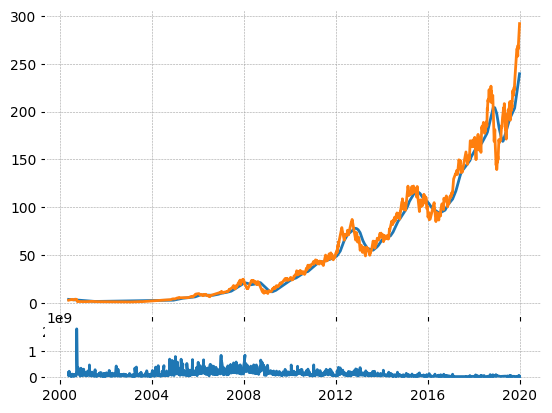

In [90]:
# visualizing the moving averages using subplots which are called axes
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1) #(6,1) -> 6 rows, 1 column (grid size), (0,0) starting coordinate
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1) #sharex actually makes their x axes separate

ax1.plot(df.index, df['100 days Moving Average'])
ax1.plot(df.index, df['Adj Close'])
ax2.plot(df.index,df['Volume'])
plt.show()

In [95]:
 # creating a resampled dataset, the resample function is used to resample timeseries data
 df_resampled = df['Adj Close'].resample('10D').ohlc() # ohlc does not sum or mean the values of 20 days, but takes the open high low close data
 df_resampled['Volume'] = df['Volume'].resample('10D').mean()
 df_resampled.columns=['Open', 'High','Low','Close','Volume']
 print(df_resampled.head())
 print(df_resampled.shape) # condensed to 717 entries.


                Open      High       Low     Close        Volume
Date                                                            
2000-05-24  2.711102  2.861825  2.597093  2.861825  1.467720e+08
2000-06-03  2.823178  2.985497  2.819314  2.819314  8.197467e+07
2000-06-13  2.921729  3.439602  2.796125  3.323659  9.481710e+07
2000-06-23  3.196123  3.366172  3.169071  3.238636  5.862407e+07
2000-07-03  3.296607  3.640566  3.192259  3.640566  6.751140e+07
(717, 5)


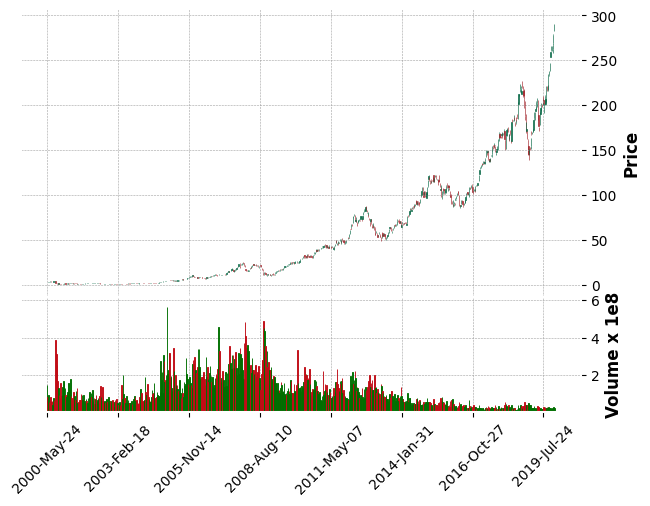

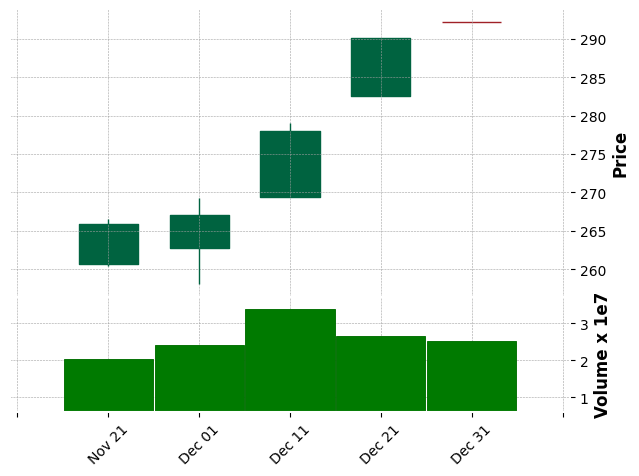

In [96]:
import mplfinance as mpf
mpf.plot(df_resampled, type = 'candle', style='charles', volume=True)
mpf.plot(df_resampled.tail(), type = 'candle', style='charles', volume=True) # to show the zomed in version

In [119]:
# Going to use original data (df) to create a target array
# target array will have predictions for what the close price will be in 100 days
df = pd.read_csv('apple.csv')
print(df.shape)
days = 50
df['Predicted_actual'] = df['Adj Close'].shift(-days) # predicted has the the 51st value from the original dataset
print(df.head())
#df.dropna(inplace=True) # to remove the 

(5031, 7)
         Date      High       Low  ...       Volume  Adj Close  Predicted_actual
0  2000-01-03  4.017857  3.631696  ...  133949200.0   3.460857          3.594190
1  2000-01-04  3.950893  3.613839  ...  128094400.0   3.169071          3.758441
2  2000-01-05  3.948661  3.678571  ...  194580400.0   3.215448          3.864721
3  2000-01-06  3.821429  3.392857  ...  191993200.0   2.937188          3.802885
4  2000-01-07  3.607143  3.410714  ...  115183600.0   3.076317          4.171965

[5 rows x 8 columns]


In [136]:
# Creating a feature matrix for sklearn
X = np.array(df.drop(['Date','Predicted_actual'],1))[:-days] #the last 50 values are removed and only the Adjusted Close price is used
print(X)
# create target array 
y = np.array(df['Predicted_actual'])[:-days]
print(y)

[[4.01785707e+00 3.63169646e+00 3.74553561e+00 3.99776793e+00
  1.33949200e+08 3.46085739e+00]
 [3.95089293e+00 3.61383939e+00 3.86607146e+00 3.66071439e+00
  1.28094400e+08 3.16907120e+00]
 [3.94866061e+00 3.67857146e+00 3.70535707e+00 3.71428561e+00
  1.94580400e+08 3.21544814e+00]
 ...
 [2.35240005e+02 2.33199997e+02 2.33369995e+02 2.34369995e+02
  1.84758000e+07 2.32485870e+02]
 [2.36149994e+02 2.33520004e+02 2.35089996e+02 2.35279999e+02
  1.68963000e+07 2.33388565e+02]
 [2.37580002e+02 2.34289993e+02 2.34589996e+02 2.36410004e+02
  2.43584000e+07 2.34509491e+02]]
[  3.59419012   3.75844073   3.86472106 ... 288.33331299 290.0446167
 292.16381836]


In [0]:
# Splitting the data into 20% testing and 80% training
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2) #we use xtrain and ytrain for training

In [138]:
# Decision Tree regressor is a tree based training algorithm
tree = DecisionTreeRegressor().fit(x_train, y_train)
tree.score(x_test, y_test) # this gets the model accuracy

0.9655735067775509

In [141]:
#using the last 50 values of feature matrix to graph it against predictions made using the predict function. 
#We graph them alongside actual values from the dataset. 
#The last 50 values of the feature matrix would make predictions on the last 50 days of the actual dataset
feature_matrix =  df.drop(['Date','Predicted_actual'],1)[:-days]
feature_last_20 = np.array(feature_matrix.tail(days))
feature_last_20

array([[2.02759995e+02, 1.99289993e+02, 2.01300003e+02, 2.00990005e+02,
        2.46197000e+07, 1.99374222e+02],
       [2.02050003e+02, 1.99149994e+02, 1.99619995e+02, 2.00479996e+02,
        2.24749000e+07, 1.98868317e+02],
       [2.12139999e+02, 2.00479996e+02, 2.01020004e+02, 2.08970001e+02,
        4.72185000e+07, 2.07290085e+02],
       [2.06440002e+02, 2.02589996e+02, 2.03160004e+02, 2.02750000e+02,
        3.65474000e+07, 2.01120071e+02],
       [2.05139999e+02, 1.99669998e+02, 2.03460007e+02, 2.01740005e+02,
        2.72274000e+07, 2.00118195e+02],
       [2.07160004e+02, 2.03839996e+02, 2.04279999e+02, 2.06500000e+02,
        2.76204000e+07, 2.04839920e+02],
       [2.12729996e+02, 2.10029999e+02, 2.10619995e+02, 2.10350006e+02,
        2.44136000e+07, 2.08658981e+02],
       [2.13350006e+02, 2.10320007e+02, 2.10880005e+02, 2.10360001e+02,
        2.68843000e+07, 2.08668900e+02],
       [2.13649994e+02, 2.11600006e+02, 2.12990005e+02, 2.12639999e+02,
        2.15354000e+07, 

In [142]:
prediction = tree.predict(feature_last_20)
print(prediction) # these are the predicted values of the closing price of the last 50 trading days in the dataset

[238.57650757 238.03094482 241.22505188 154.63815308 244.59771729
 247.04786682 241.33415222 241.33415222 265.74822998 253.76344299
 255.42993164 255.06292725 255.17201233 215.93003845 258.82345581
 260.87301636 222.16947937 263.13153076 265.74822998 263.13153076
 265.74822998 264.94232178 261.85803223 260.68399048 260.45513916
 265.02191162 262.9524231  266.48446655 265.89746094 262.8230896
 258.13696289 262.8230896  264.23590088 269.3399353  265.56912231
 267.12124634 269.3996582  270.08615112 273.75747681 269.3996582
 278.99087524 278.32424927 278.60281372 278.02575684 162.20536804
 278.02575684 288.44277954 288.33331299 290.0446167  278.02575684]


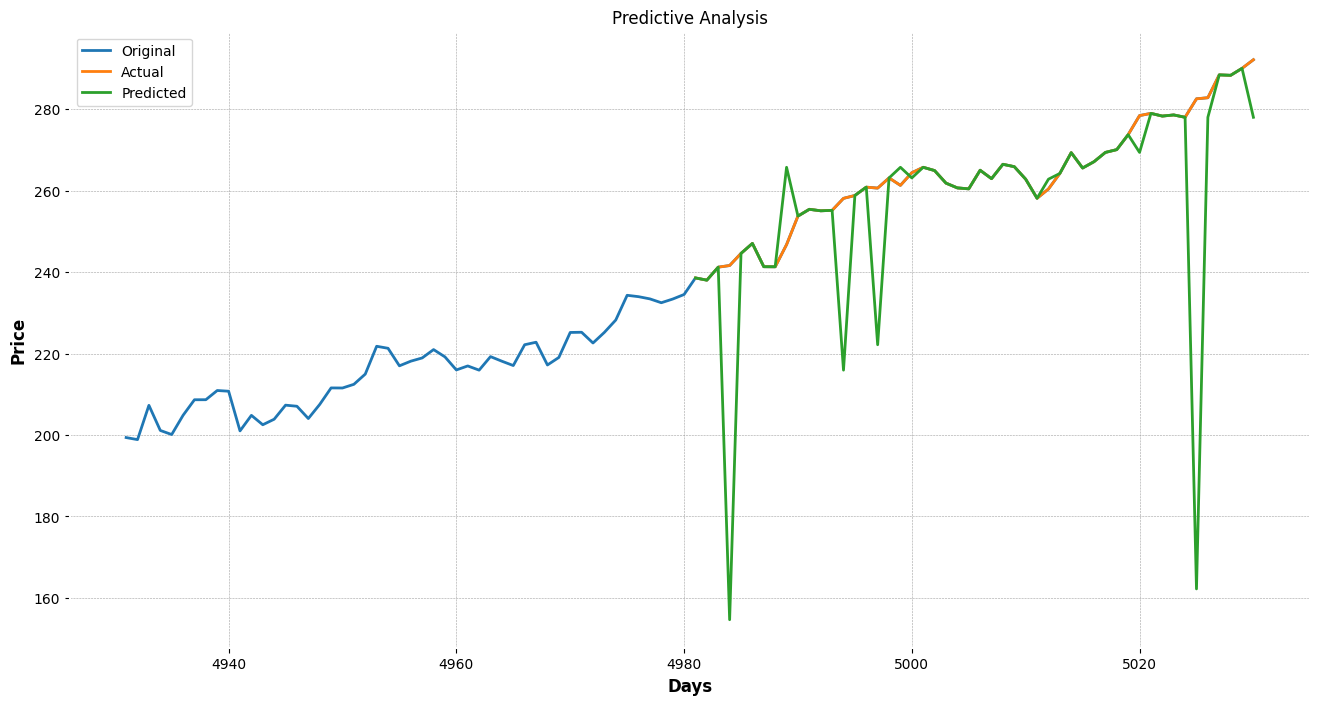

In [144]:
# Visualizing our predictions
Actual_last_20 = df.drop(['Predicted_actual','Volume','High','Low','Close','Open'],1)
Actual_last_20 = Actual_last_20[X.shape[0]:]
Actual_last_20['Prediction'] = prediction
last_100 = Actual_last_20.tail(100)
last_100_2 = df.tail(100)
plt.figure(figsize=(16,8))
plt.plot(last_100_2['Adj Close']) 
plt.plot(last_100[['Adj Close','Prediction']])
plt.title('Predictive Analysis')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend(['Original', 'Actual','Predicted'])